# **Final Project 4 (Credit Card Dataset for Clustering)**

Group 7 :

1. Ainal Fajri Malahayati (PYTN-KS12-006)
2. Raihan Daffa Aziz (PYTN-KS12-025)
3. Tsaabitah Anggraini (PYTN-KS12-023)

## **About Dataset**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

1. CUST_ID : Identification of Credit Card holder (Categorical)
2. BALANCE : Balance amount left in their account to make purchases (
3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
7. CASH_ADVANCE : Cash in advance given by the user
8. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
12. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
13. PURCHASES_TRX : Numbe of purchase transactions made
14. CREDIT_LIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user
17. PRCFULLPAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user

## **Import Library**

In [437]:
# Libraries for clustering and evaluation
! pip install yellowbrick


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.metrics as metrics
import statistics
import plotly.graph_objs as go
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy import stats
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

<br>

## **Load Data**

Pada proses data loading ini, kita akan mencoba membaca dataset dalam bentuk dataframe dengan menggunakan library pandas. Setelah itu akan ditampilkan baris-baris teratas dari dataframe dengan method head().

In [439]:
data = pd.read_csv("dataset/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [440]:
data.shape

(8950, 18)

Berdasarkan hasil diatas, dataset terdiri dari 8950 baris dan 18 kolom. 1 kolom bertipe kategorikal dan 17 kolom bertipe numerikal. 

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Selain itu dengan method info() kita dapat melihat atribut apa saja yang terdapat dalam dataset, jumlah nilai null yang terdapat pada masing-masing atribut beserta tipe datanya. 

Berdasarkan hasil diatas, terdapat 1 atribut bertipe object, 3 int64 dan 14 int64. Lalu untuk nilai null, terdapat pada atribut Credit Limit dan Minimum_Payments dengan jumlah nilai null untuk masing-masing atribut tidak terlalu besar, yaitu dibawah 5%

In [442]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Untuk melihat informasi statistik data, kita dapat menggunakan method describe(). Method describe ini akan menghitung informasi statistik dari atribut yang bertipe numerik.

<br>

## **Data Cleaning**

### **Null-values**

Untuk data cleaning, terdapat  beberapa proses yang dilakukan dikarenakan terdapat 2 atribut yang terdapat nilai null (ditunjukkan oleh hasil dibawah yang mengembalikan nilai True), kemudian dilihat terlebih dahulu distribusi data untuk setiap kolomnya. 

In [443]:
data.isnull().sum().any()

True

In [444]:
data.isnull().sum()/len(data)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\422717980.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CREDIT_LIMIT', ylabel='Density'>

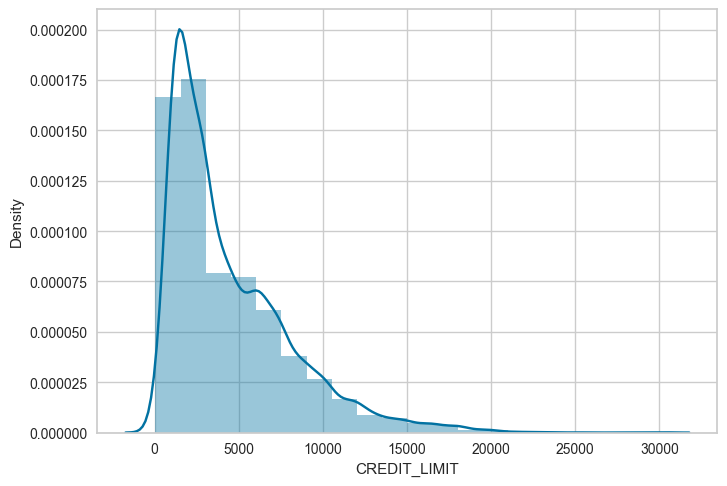

In [445]:
# melihat distribusi data yang terdapat nilai null

CreditLimit = sns.distplot(data['CREDIT_LIMIT'], bins=20, kde=True)
CreditLimit

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\850724929.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

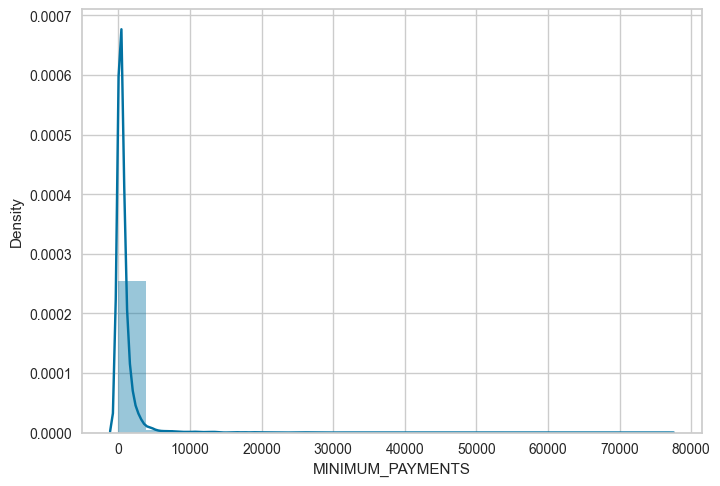

In [446]:
MinPayments = sns.distplot(data['MINIMUM_PAYMENTS'], bins=20, kde=True)
MinPayments

In [447]:
# data direplace dengan nilai median dikarenakan kolom yang terdapat nilai null memiliki distribusi right-skewed
data.fillna(data.median(), inplace = True)

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\1469684547.py:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Setelah dilihat distribusi datanya, kedua atribut memiliki distribusi data yang bertipe right skewed sehingga banyak nilai yang bertumpuk di sisi kiri. Oleh karena itu, untuk proses cleaning, nilai null tadi akan direplace dengan nilai median dari setiap kolomnya. Dan dilakukan pengecekan kembali apakah dataset sudah bersih dari nilai null.

In [448]:
data.isnull().sum().any()

False

### **Duplicate values**

Pada dataset ini tidak ditemukan data yang duplikat, hal ini ditunjukkan oleh nilai yang dihasilkan pada proses dibawah yaitu False.

In [449]:
data.duplicated().sum().any()

False

### **Handle Skewness**

Tujuan utama dalam menangani skewed data pada dataset adalah untuk mencapai distribusi yang lebih seimbang atau normal antara nilai-nilai atribut yang ada. Skewed data mengacu pada situasi di mana distribusi nilai atribut tidak terdistribusi secara merata atau simetris, melainkan memiliki kemiringan atau kecenderungan tertentu.

Berikut adalah beberapa tujuan dalam menangani skewed data:

1. Mengurangi Bias: Skewed data dapat menyebabkan bias dalam model atau analisis statistik. Dengan menyeimbangkan distribusi atribut, kita dapat mengurangi kemungkinan terjadinya bias yang dapat mempengaruhi hasil analisis.

2. Meningkatkan Performa Model: Beberapa model atau algoritma machine learning cenderung bekerja lebih baik pada data yang memiliki distribusi yang lebih seimbang. Dengan menyeimbangkan skewed data, kita dapat meningkatkan performa model dengan memberikan bobot yang lebih adil pada masing-masing kelas atau nilai atribut yang ada.

3. Memperbaiki Prediksi: Dalam beberapa kasus, skewed data dapat menyebabkan prediksi yang tidak akurat atau tidak seimbang. Dengan menangani skewed data, kita dapat memperbaiki prediksi dengan meningkatkan keakuratan dan keseimbangan antara kelas atau nilai atribut yang berbeda.

4. Meningkatkan Interpretasi dan Analisis: Dalam analisis data dan pemodelan statistik, distribusi yang lebih seimbang atau normal mempermudah interpretasi hasil dan memungkinkan analisis yang lebih komprehensif. Dengan menangani skewed data, kita dapat menghasilkan hasil yang lebih terpercaya dan dapat diinterpretasikan dengan lebih baik.

5. Mengoptimalkan Pengambilan Keputusan: Menghadapi skewed data dapat mempengaruhi keputusan bisnis yang diambil. Dengan menyeimbangkan distribusi atribut, kita dapat mengoptimalkan pengambilan keputusan dengan mempertimbangkan informasi yang lebih akurat dan representatif.

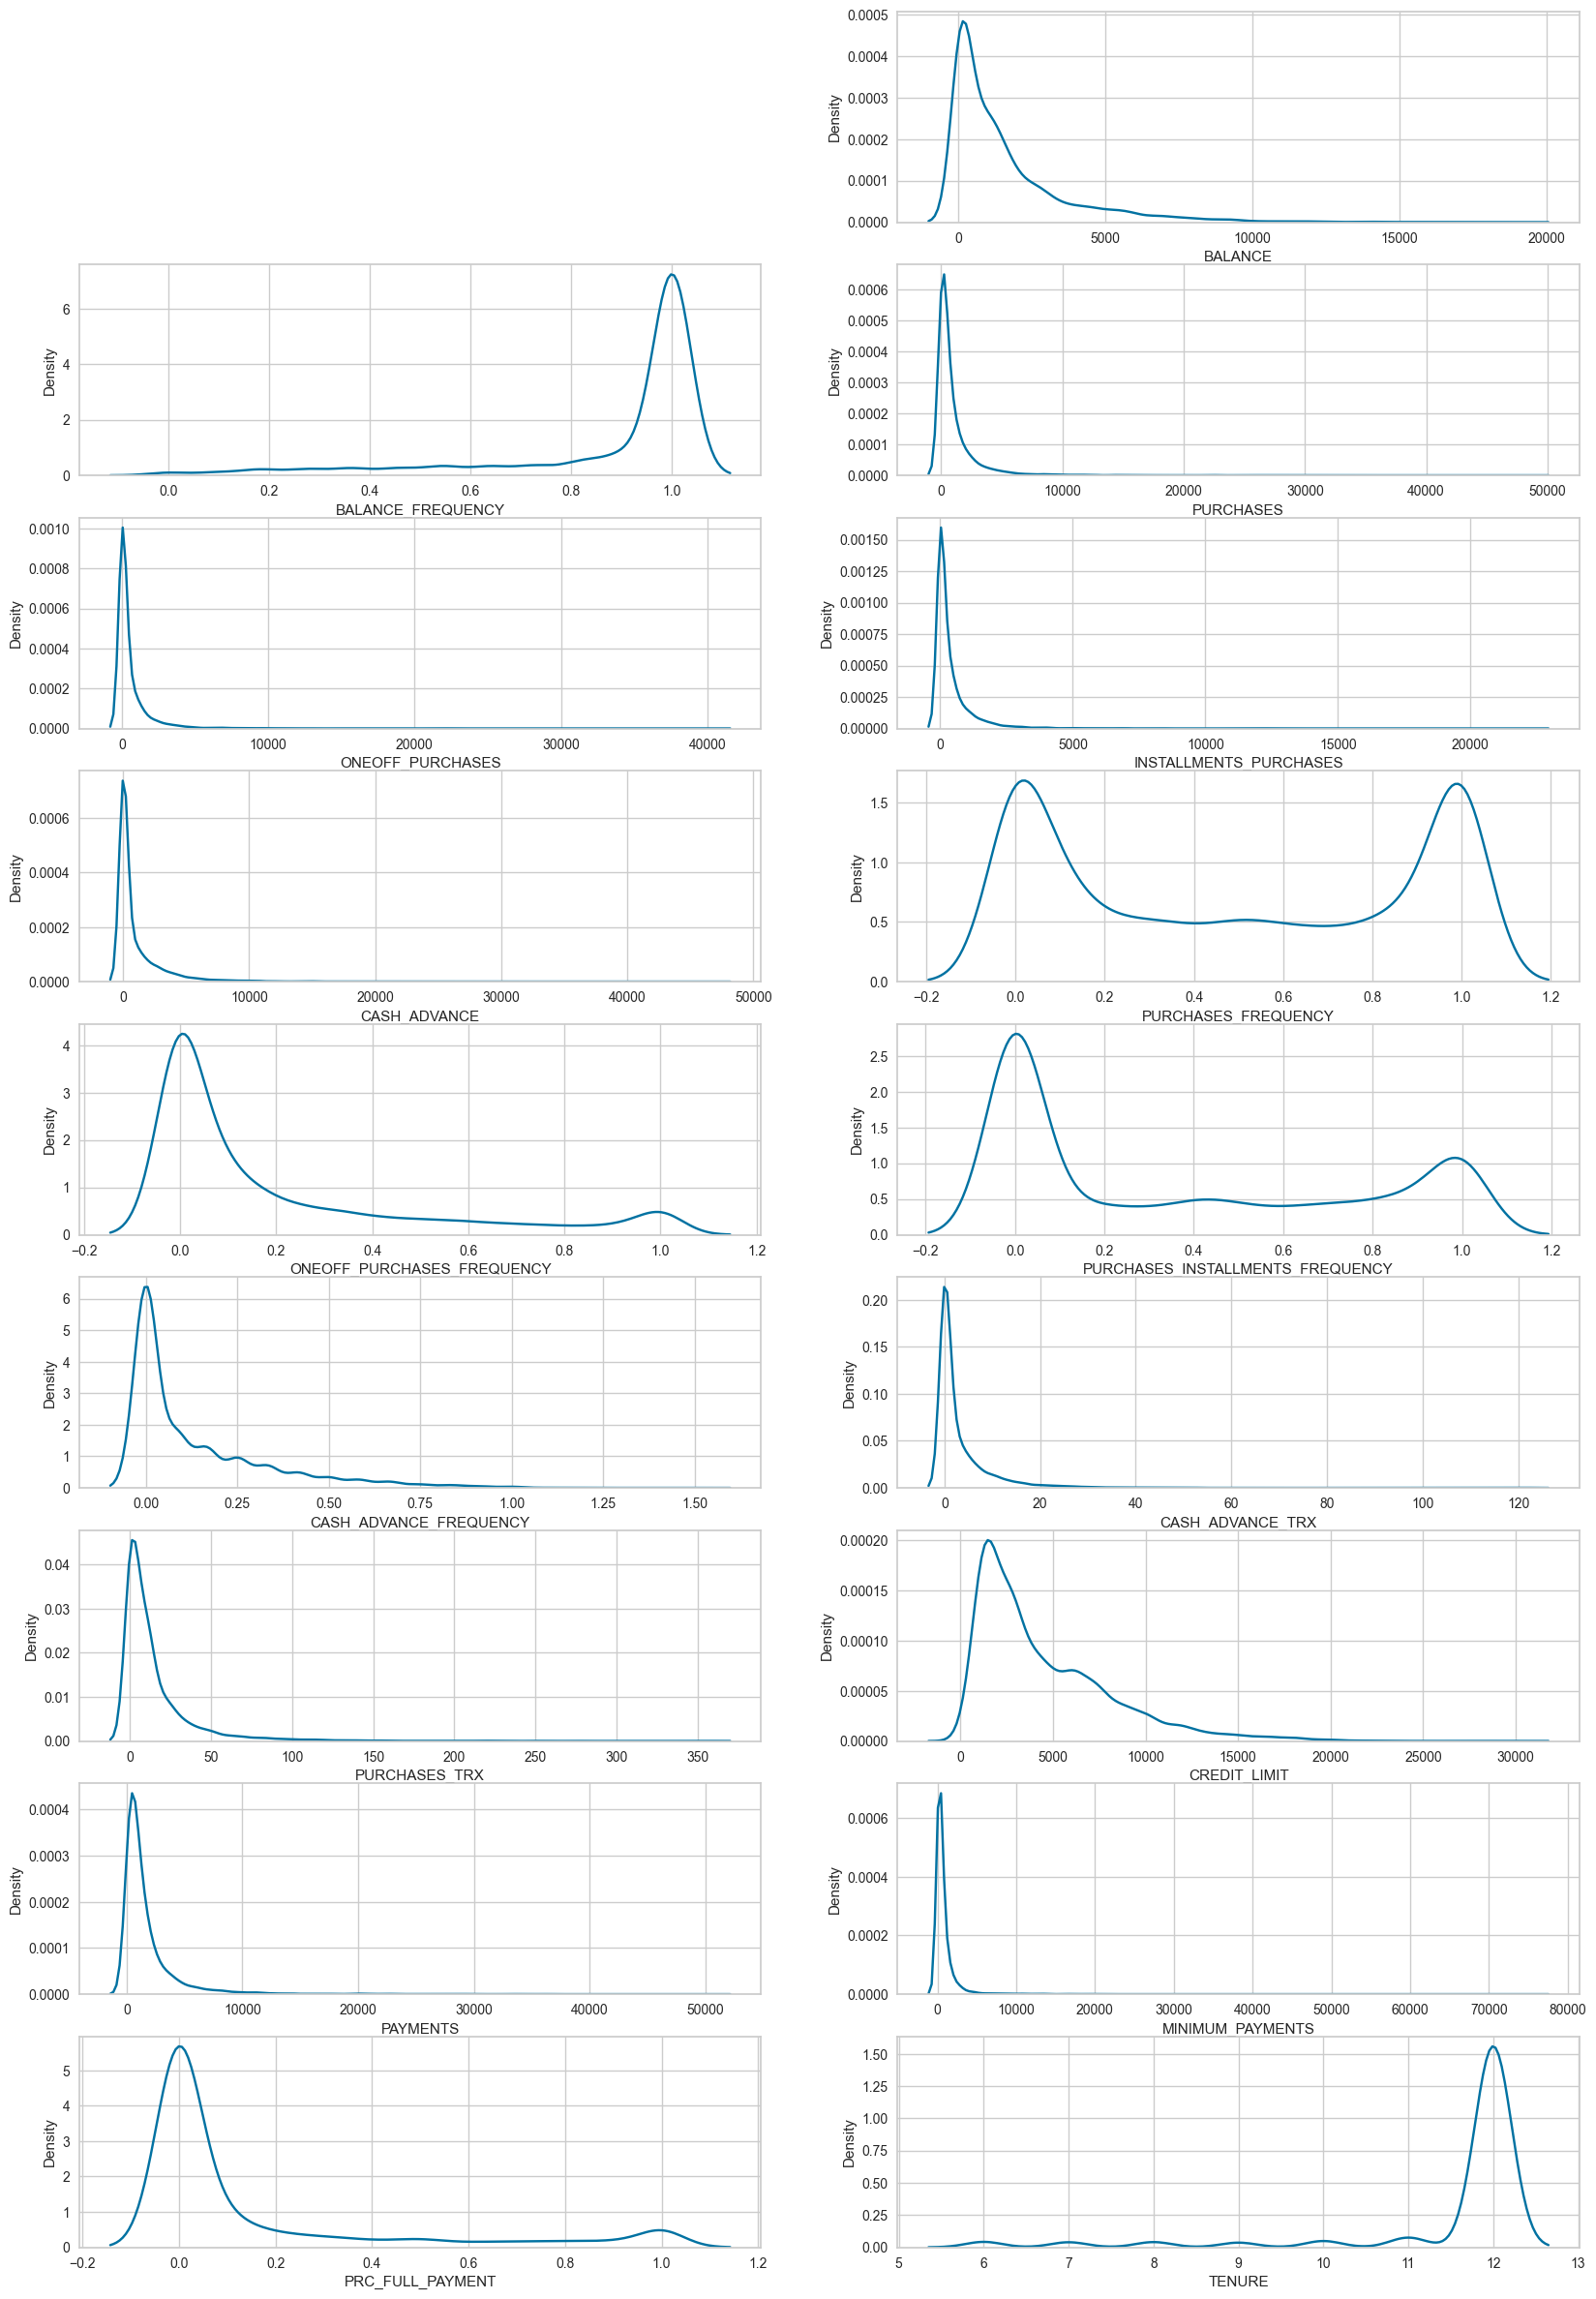

In [450]:
plt.figure(figsize=(20,30))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [451]:
positively_skewed_cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

Positive skewed (atau right-skewed) merujuk pada pola distribusi data di mana ekor distribusi data cenderung lebih panjang di sebelah kanan atau nilai-nilai yang lebih tinggi. Dalam positive skewed, nilai-nilai yang lebih rendah cenderung terkumpul di sebelah kiri grafik distribusi, sedangkan nilai-nilai yang lebih tinggi merentang ke arah kanan.

Menggunakan transformasi logaritmik adalah salah satu cara umum untuk menangani data yang memiliki skewed ke kanan (right-skewed). Transformasi logaritmik dapat membantu menyebarkan nilai-nilai yang tinggi ke dalam rentang yang lebih kecil dan mengurangi perbedaan skala antara nilai-nilai ekstrem. 

In [452]:
data_new = data.copy()
for col in positively_skewed_cols:
    data_new[col] = np.log(1 + data_new[col])

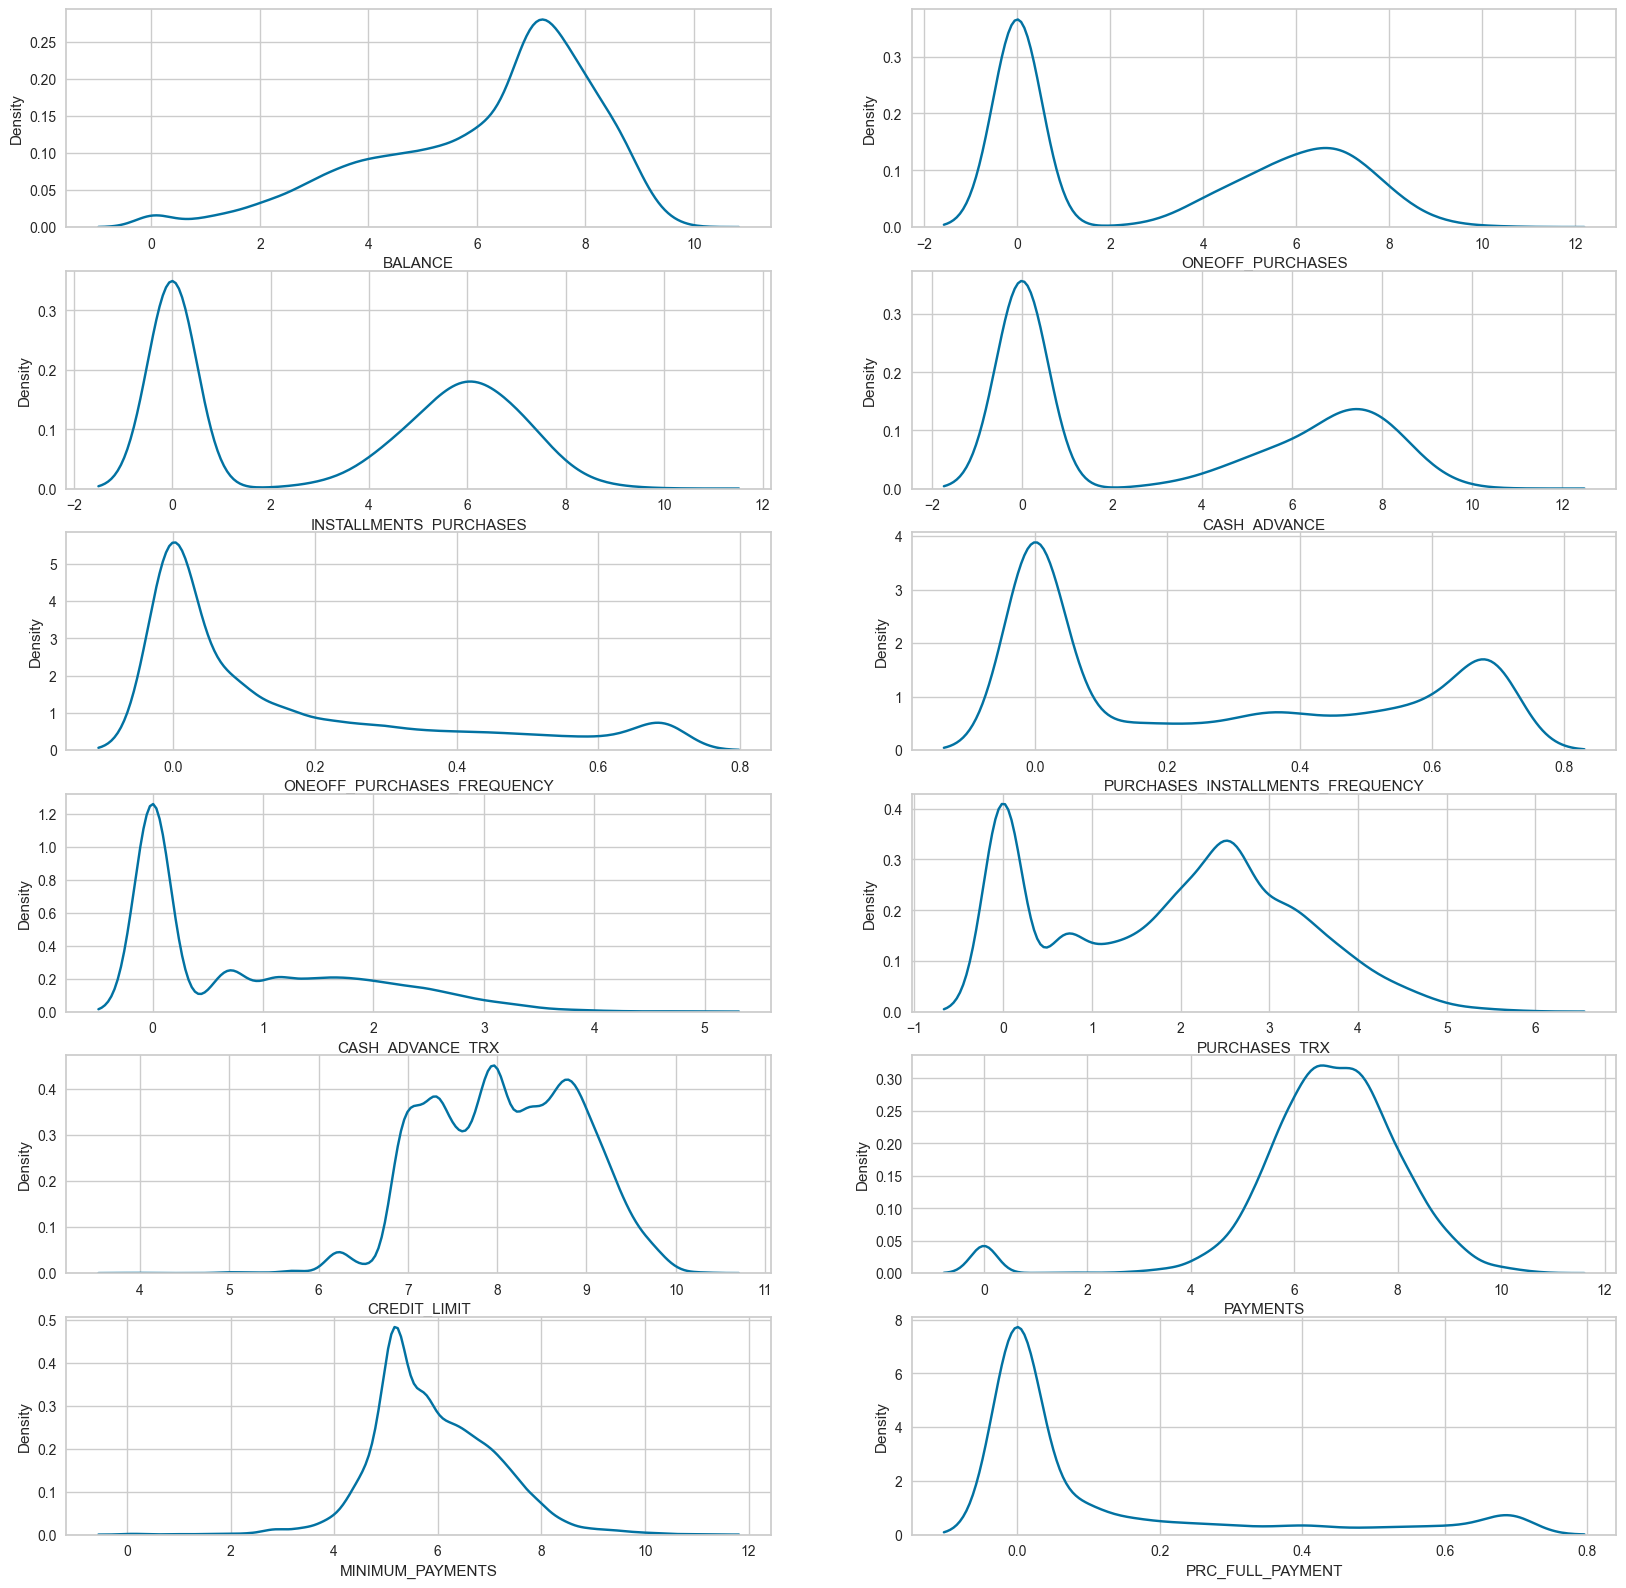

In [453]:
plt.figure(figsize=(20,30))
for i, col in enumerate(positively_skewed_cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(data_new[col], ax=ax)
    plt.xlabel(col)
plt.show()

<br>

## **Data Exploration**

### **Query**

In [454]:
mode = data1['TENURE'].mode()
print(mode)

0    12
Name: TENURE, dtype: int64


In [455]:
# Menghitung jumlah user dengan nilai payments yang besar dan modus dari tenure
# Untuk sebelumnya telah dicari terlebih dahulu modus dari TENURE yaitu sebesar 12
data1 = data_new[['PAYMENTS', 'TENURE']]
Query1 = data1[(data1['PAYMENTS'] >= data1['PAYMENTS'].median()) & (data1['TENURE'] == 12)]
Query1

,PAYMENTS,TENURE
1,8.319725,12
5,7.244983,12
6,8.757047,12
9,7.061138,12
10,6.988691,12
...,...,...
8726,6.894208,12
8737,9.009197,12
8741,6.893041,12
8752,7.183680,12


Berdasarkan hasil query diatas dapat diinterpretasi bahwa hampir 50% user yang melakukan payment dalam jumlah besar dengan menggunakan kartu kredit dengan tempo pemakaian yang cukup lama yaitu 12 bulan. Berdasarkan hasil query ini dapat disimpulkan bahwa hampir 50% user tertarik dalam bertransaksi menggunakan kartu kredit.  

In [456]:
# Untuk hasil query2 kita akan melihat jumlah user berdasarkan atribut purchases dan purchases_frequency. 
data2 = data_new[['PURCHASES','PURCHASES_FREQUENCY']]
Query2 = data2[(data2['PURCHASES_FREQUENCY'] >= data2['PURCHASES_FREQUENCY'].median())]
Query2

,PURCHASES,PURCHASES_FREQUENCY
2,773.17,1.000000
5,1333.28,0.666667
6,7091.01,1.000000
7,436.20,1.000000
10,920.12,1.000000
...,...,...
8942,113.28,1.000000
8945,291.12,1.000000
8946,300.00,1.000000
8947,144.40,0.833333


### **Central Tendency**

In [457]:
# 1. Mencari mean
# Menemukan rata-rata dari atribut CASH_ADVANCE_FREQUENCY
mean = data_new['CASH_ADVANCE_FREQUENCY'].mean()
print(mean)

# 2. Mencari mode
# Menemukan modus untuk dari atribut TENURE
mode = data_new['TENURE'].mode()
print(mode)

# 3. Mencari median untuk atribut PURCHASES_FREQUENCY
median = statistics.median(data_new['PURCHASES_FREQUENCY'])
print(median)

0.13514420033519556
0    12
Name: TENURE, dtype: int64
0.5


Untuk central tendency kita akan mencoba menghitung rata-rata dari CASH_ADVANCE_FREQUENCY, modus dari TENURE dan median dari PURCHASES_FREQUENCY. Rata-rata dari CASH_ADVANCE_FREQUENCY yang dihasilkan yaitu sebesar 0.1351442003351972, dan modus untuk TENURE ialah 12, dan median untuk PURCHASES_FREQUENCYsebesar 0.5

### **Variability**

In [458]:
# 1. Variance
var = np.var(data_new['PURCHASES_FREQUENCY'], ddof=1)
print("Variance of PURCHASES_FREQUENCY: ", var)
# 2. Standard Deviation
std = np.std(data_new['PURCHASES_FREQUENCY'], ddof=1)
print("Standard Deviation of PURCHASES_FREQUENCY: ", std)
# 3. Skewness
z = data_new['PURCHASES_FREQUENCY']
z.skew()
print("Skewness: ", z.skew())
# 4. Percentiles
percentile = np.percentile(z, [25, 50, 75])
print("Percentile: ", percentile)
# 5. Ranges
range_ = np.ptp(z)
print("Range: ", range)

Variance of PURCHASES_FREQUENCY:  0.16109847684358256
Standard Deviation of PURCHASES_FREQUENCY:  0.40137074736904105
Skewness:  0.06016423585803591
Percentile:  [0.083333 0.5      0.916667]
Range:  <class 'range'>


Sedangkan untuk variabilty, kita akan menghitung varians, standar deviasi, skewness, percentiles dan ranges untuk atribut PURCHASES_FREQUENCY.

<br>

## **Data Visualization**

Untuk visualisasi data, akan ditampilkan distplot untuk melihat distrbusi data untuk kolom PAYMENTS dan PURCHASES karena kedua kolom ini memiliki keterkaitan yang begitu kuat untuk menentukan apakah user tertarik dalam menggunakan creditcard

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\92883832.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




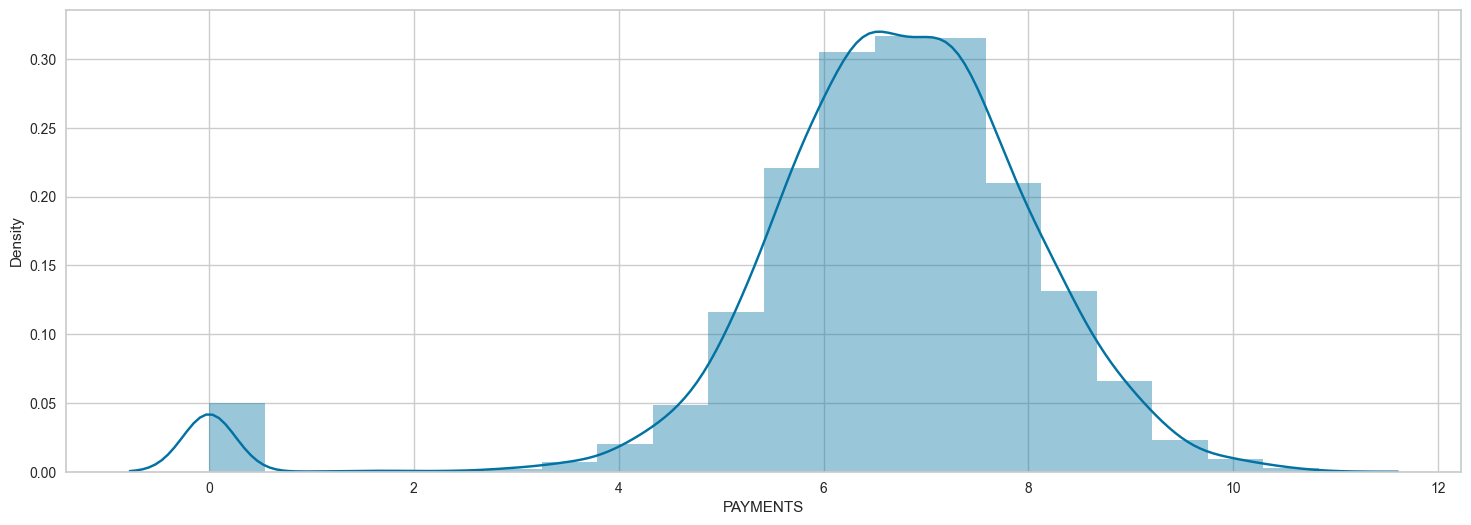

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\92883832.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




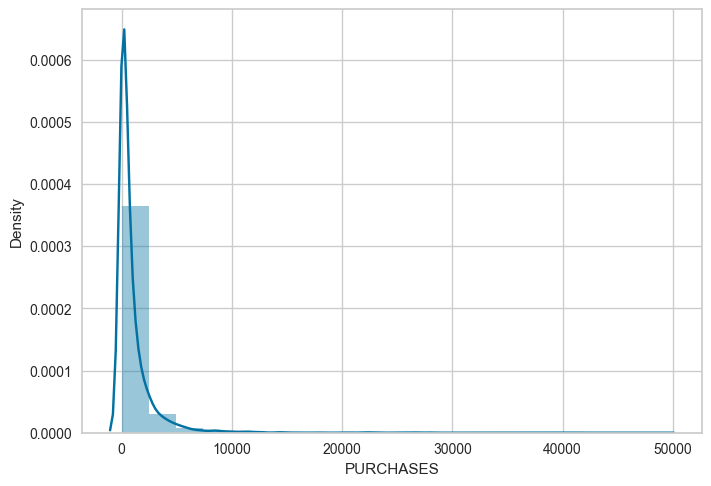

In [459]:
plt.figure(figsize=(18,6))
sorted_creditcard_data1 = data_new.sort_values(by='PAYMENTS', ascending=True)
sorted_creditcard_data2 = data_new.sort_values(by='PURCHASES', ascending=True)

# Melihat distribusi data untuk atribut PAYMENTS dan PURCHASES
p1=sns.distplot(sorted_creditcard_data1['PAYMENTS'], bins=20, kde=True)
plt.show(p1)
p2=sns.distplot(sorted_creditcard_data2['PURCHASES'], bins=20, kde=True)
plt.show(p2)

Untuk hasil distribusi atribut PAYMENTS, dapat dilihat besar payments yang sering dilakukan oleh user adalah sebesar 7 dengan tingkat density 0.30.
Hal ini menandakan user cenderung melakukan payment dengan nominal yang cukup besar (yaitu 7) dengan menggunakan creditcard dibandingkan dengan payment dengan nominal yang kecil. Sebaliknya, berdasarkan hasil distribusi PURCHASES banyak user yang melakukan pembelian dengan nominal kecil dengan menggunakan credit card dibandingkan melakukan pembelian dengan jumlah yang besar.

<br>

## **Data Preprocessing**

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\4029712085.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



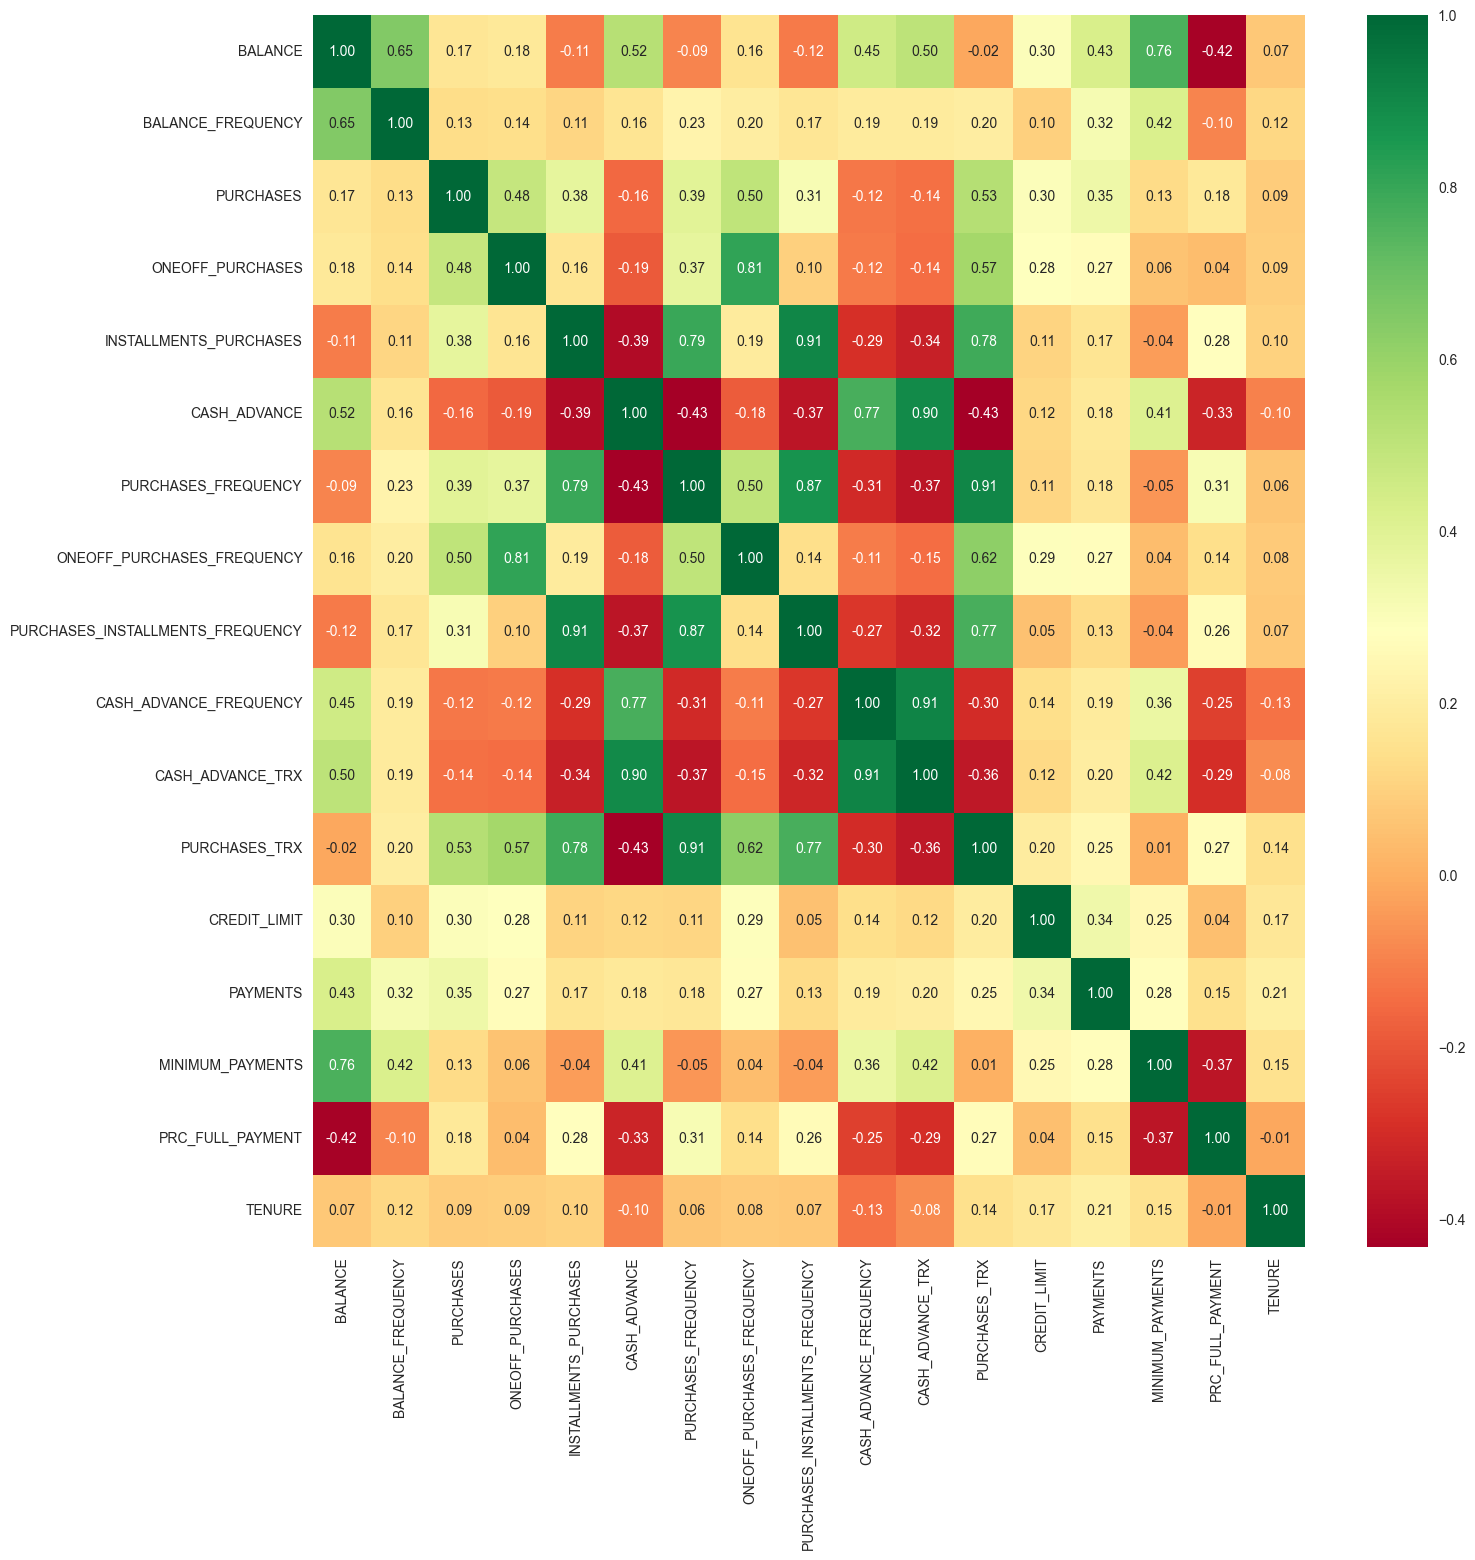

In [460]:
# Correlation map

data_corr = data_new.corr()
f, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 10}, ax=ax)
plt.show()

In [461]:
# Deleting CUST_ID
data_new.drop(columns=['CUST_ID'], inplace=True)

Kolom CUST_ID dihapus untuk mempermudah proses modelling pada clustering nanti.

<br>

## **Data Modelling**

### **KMeans**


K-means adalah algoritme clustering yang populer dan sederhana yang digunakan untuk mengelompokkan objek-objek data ke dalam kelompok atau klaster berdasarkan kesamaan atribut. Algoritme ini berusaha untuk meminimalkan jumlah varian dalam setiap klaster dan memaksimalkan varian antara klaster.

KelbowVisualizer adalah sebuah fungsi yang digunakan untuk memvisualisasikan elbow atau metode "elbow" dalam pemilihan jumlah cluster yang optimal dalam algoritme clustering, seperti K-means. Metode elbow digunakan untuk mencari jumlah cluster yang paling optimal berdasarkan evaluasi inersia (inertia) atau nilai kekosongan (within-cluster sum of squares). Berdasarkan proses dibawah, jumlah cluster yang paling optimal adalah 4.

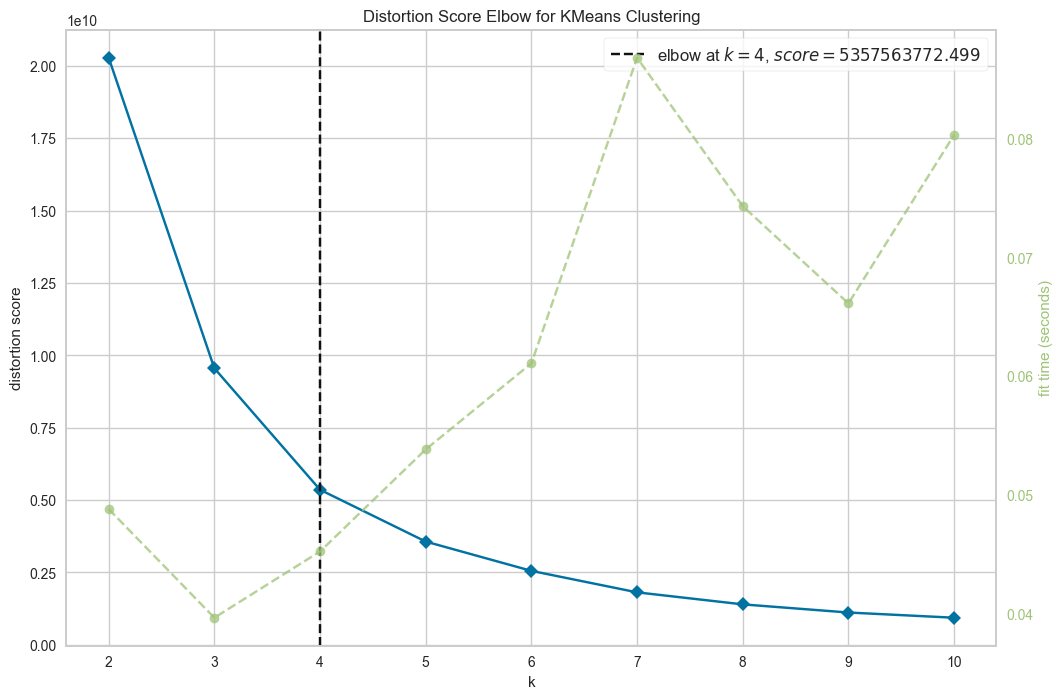

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [462]:
# KElbowVisualizar

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data_new)
elbow_graph.show()

Sebelum dilakukannya proses kmeans clustering, data tadi akan dilakukan scaling dan juga PCA.

1. StandardScaler adalah sebuah fungsi yang digunakan untuk melakukan standarisasi atau normalisasi data. Standarisasi adalah proses mengubah data sehingga memiliki rata-rata nol dan simpangan baku (standard deviation) satu. 

2. PCA (Principal Component Analysis) adalah metode statistik yang digunakan untuk mengurangi dimensi dari dataset yang kompleks, dengan tujuan mengidentifikasi pola dan struktur yang terkandung di dalamnya. PCA mengubah variabel-variabel asli yang berkorelasi tinggi menjadi komponen-komponen baru yang disebut sebagai "komponen utama" (principal components).

In [463]:
# Data
ss = StandardScaler()
X = ss.fit_transform(data_new)

# Reducing Dimensions
pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X)

# Fit KMeans
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_kmeans = kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

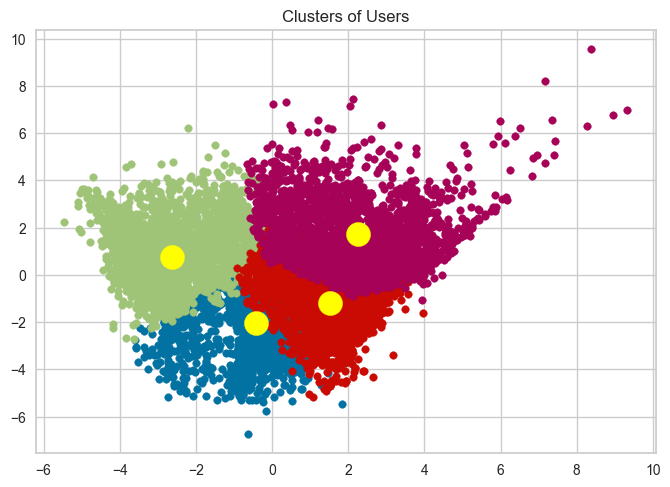

In [464]:
# Visualising the clusters
for i in range(4):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 30, label = 'Cluster ' + str(i + 1))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Users')
plt.show()

Dilakukan visualisasi cluster dengan go berdasarkan atribut CREDIT_LIMIT dan BALANCE. Terdapat 4 cluster:

1. Cluster 0
Cluster 0 memiliki karakteristik dengan kelompok user yang memiliki credit limit sekitar 6-8 dan balance yang kurang dari 10
2. Cluster 1
Cluster 1 memiliki karakteristik dengan kelompok user yang memiliki credit limit sekitar 8-9 dan balance yang kurang dari 10
3. Cluster 2
Cluster 2 memiliki karakteristik dengan kelompok user yang memiliki credit limit lebih dari 9 dan balance yang kurang dari 10
4. Cluster 3
Cluster 3 memiliki karakteristik dengan kelompok user yang memiliki credit limit sekitar 8-9 dan balance sebesar 8


### **Hierarchial Clustering**

Hierarchical clustering adalah metode analisis klaster yang digunakan untuk mengelompokkan objek-objek data ke dalam kelompok atau klaster berdasarkan kesamaan mereka. Metode ini membangun struktur hirarki klaster dengan cara menggabungkan atau membagi klaster secara berurutan.

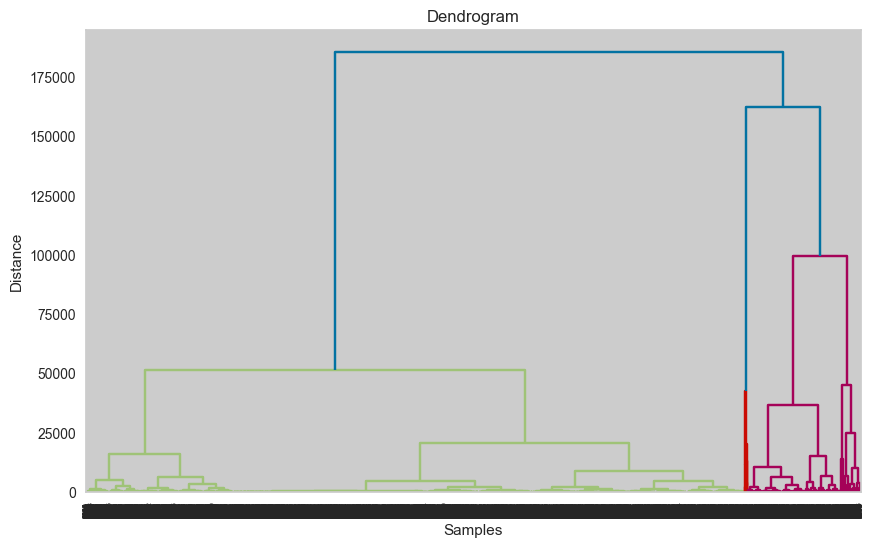

In [465]:
# Apply hierarchical clustering
linkage_matrix = linkage(data_new, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Initialize the Hierarchical clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=4)

# Fit the Hierarchical model to the scaled data
hierarchical.fit(data_new)

# Get the cluster labels
hierarchical_labels = hierarchical.labels_

Dendrogram sejatinya merupakan struktur yang menggambarkan kemiripan antar data. Tiap data pada awalnya diletakan di suatu level dasar dimana tiap data berdiri sendiri sebagai satu cluster tunggal. Kemudian, data-data terdekat akan digabungkan menjadi satu cluster dan dihubungkan dengan suatu garis. 

### **DBScan Clustering**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah sebuah metode clustering yang berfokus pada kepadatan data. DBSCAN mengelompokkan objek-objek dalam dataset berdasarkan kedekatan spasial dan kepadatan data di sekitarnya.

In [466]:
# Initialize the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the scaled data
dbscan.fit(data_new)

# Get the cluster labels (-1 represents outliers)
dbscan_labels = dbscan.labels_

<br>

## **Evaluasi**

Silhouette Coefficient adalah metrik evaluasi yang digunakan untuk mengukur kualitas clustering pada algoritma K-means. Metrik ini menggabungkan ukuran kedekatan antara titik data dengan cluster tempatnya berada (cohesion) dan jarak antara titik data dengan cluster lain yang berdekatan (separation). 

Silhouette Coefficient berkisar antara -1 hingga 1, dengan nilai yang lebih tinggi menunjukkan pengelompokan yang lebih baik:

- Nilai dekat dengan 1 menunjukkan bahwa titik data terletak dengan baik dalam clusternya, dan jarak antara cluster lainnya cukup jauh.
- Nilai mendekati 0 menunjukkan adanya tumpang tindih antara cluster, atau titik data terletak dekat dengan batas antara dua cluster yang berdekatan.
- Nilai mendekati -1 menunjukkan bahwa titik data mungkin ditempatkan dengan lebih baik dalam cluster lain daripada cluster tempatnya berada saat ini.

Nilai Silhouette Coefficient yang lebih tinggi menunjukkan bahwa pengelompokan yang dihasilkan oleh K-means lebih baik. Namun, perlu diingat bahwa Silhouette Coefficient hanya memberikan evaluasi internal terhadap pengelompokan dan tidak mempertimbangkan informasi eksternal seperti label kelas yang sebenarnya. Oleh karena itu, penting untuk digunakan bersama dengan metrik lain dan pertimbangan domain untuk memilih jumlah cluster (k) yang optimal dalam algoritma K-means.

In [467]:
kmeans_silhouette = silhouette_score(data_new, pred)
hierarchical_silhouette = silhouette_score(data_new, hierarchical_labels)
dbscan_silhouette = silhouette_score(data_new, dbscan_labels)

print("Silhouette Score:")
print("K-means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("DBScan Silhouette Score:", dbscan_silhouette)

Silhouette Score:
K-means Silhouette Score: -0.007986101937016158
Hierarchical Silhouette Score: 0.735895742363378
DBScan Silhouette Score: -0.44423352954424783


Hasil silhoutte score tertinggi diperoleh Hierarchial Score yaitu sebesar 0.7233966274495568 yang menunjukkan bahwa titik data terletak dengan baik dalam clusternya, dan jarak antara cluster lainnya cukup jauh.

Sedangkan hasil dibawah ini menampilkan record data untuk setiap cluster dari ketiga jenis algoritma yang digunakan tadi, yaitu KMeans, Hierarchial Clustering dan DBScan.

In [468]:
# 1. Untuk KMeans
data_new["cluster"] = pred
data_new.groupby("cluster").describe()

BALANCE                                                              \
          count      mean       std       min       25%       50%       75%   
cluster                                                                       
0        1665.0  4.307068  2.067622  0.000000  2.771568  4.351969  6.017087   
1        2876.0  7.503076  0.907456  3.115421  6.970973  7.497619  8.160295   
2        2216.0  4.934153  1.810905  0.000000  3.637351  4.822105  6.631517   
3        2193.0  7.050823  1.273336  2.596985  6.126102  7.212428  8.019933   

                  BALANCE_FREQUENCY            ... PRC_FULL_PAYMENT            \
              max             count      mean  ...              75%       max   
cluster                                        ...                              
0        8.338597            1665.0  0.609169  ...         0.105360  0.693147   
1        9.699282            2876.0  0.948677  ...         0.000000  0.693147   
2        9.001598            2216.0  0.883922  ...         0.405465  0.693147   
3        9.854515            2193.0  0.980456  ...         0.223144  0.693147   

         TENURE                                                    
          count       mean       std  min   25%   50%   75%   max  
cluster                                                            
0        1665.0  11.385586  1.491654  6.0  12.0  12.0  12.0  12.0  
1        2876.0  11.375522  1.489025  6.0  12.0  12.0  12.0  12.0  
2        2216.0  11.461191  1.436176  6.0  12.0  12.0  12.0  12.0  
3        2193.0  11.860009  0.686158  6.0  12.0  12.0  12.0  12.0  

[4 rows x 136 columns]

In [469]:
# 2. Untuk Hierarchial labels
data_new["cluster"] = hierarchical_labels
data_new.groupby("cluster").describe()

BALANCE                                                              \
          count      mean       std       min       25%       50%       75%   
cluster                                                                       
0        7617.0  6.012986  2.077708  0.000000  4.515743  6.719321  7.536746   
1         234.0  7.648067  1.007885  5.023568  6.778121  7.737545  8.410482   
2          22.0  8.436342  0.643236  7.546769  8.001531  8.222278  8.944568   
3        1077.0  6.843537  1.311644  0.000000  5.783995  6.838056  7.895560   

                  BALANCE_FREQUENCY            ... PRC_FULL_PAYMENT            \
              max             count      mean  ...              75%       max   
cluster                                        ...                              
0        9.699282            7617.0  0.862419  ...         0.095310  0.693147   
1        9.825340             234.0  0.982372  ...         0.571427  0.693147   
2        9.854515              22.0  0.974793  ...         0.682507  0.693147   
3        9.696491            1077.0  0.957482  ...         0.367724  0.693147   

         TENURE                                                     
          count       mean       std   min   25%   50%   75%   max  
cluster                                                             
0        7617.0  11.465538  1.403459   6.0  12.0  12.0  12.0  12.0  
1         234.0  11.944444  0.482651   6.0  12.0  12.0  12.0  12.0  
2          22.0  11.909091  0.426401  10.0  12.0  12.0  12.0  12.0  
3        1077.0  11.782730  0.876775   6.0  12.0  12.0  12.0  12.0  

[4 rows x 136 columns]

In [470]:
# 3. Untuk dbscan labels
data_new["cluster"] = dbscan_labels
data_new.groupby("cluster").describe()

BALANCE                                                              \
          count      mean       std       min       25%       50%       75%   
cluster                                                                       
-1       8446.0  6.070470  2.029740  0.000000  4.723727  6.656409  7.573803   
 0        169.0  7.192050  0.188598  6.717016  7.022885  7.212617  7.332137   
 1         16.0  8.654217  0.133972  8.413119  8.573533  8.657257  8.743545   
 2         57.0  7.840323  0.142701  7.495720  7.743272  7.876057  7.921364   
 3        130.0  8.320212  0.482021  7.154482  7.973788  8.391420  8.694848   
 4          9.0  6.336461  0.123080  6.191797  6.280702  6.297511  6.372103   
 5          8.0  7.942455  0.098082  7.770229  7.899490  7.949007  8.011217   
 6         10.0  8.465056  0.114131  8.301352  8.384242  8.463566  8.491593   
 7         21.0  6.859995  0.159216  6.544204  6.777294  6.863191  6.989537   
 8          3.0  8.359845  0.128140  8.257444  8.287998  8.318551  8.411046   
 9          6.0  8.923905  0.102992  8.773000  8.891703  8.904876  8.974591   
 10        10.0  9.075463  0.126991  8.847377  9.022021  9.102491  9.140321   
 11        11.0  7.436718  0.126364  7.259226  7.373266  7.424892  7.458905   
 12         9.0  7.320898  0.150533  7.042578  7.219097  7.375085  7.433220   
 13         7.0  7.553861  0.088920  7.420334  7.508085  7.551420  7.595870   
 14         5.0  6.312034  0.235366  6.040783  6.098122  6.365868  6.471428   
 15         5.0  6.997119  0.186419  6.758406  6.878942  7.032135  7.071365   
 16         4.0  6.987990  0.037107  6.960157  6.962622  6.975668  7.001036   
 17         5.0  7.528793  0.168701  7.234913  7.570262  7.580883  7.590368   
 18        14.0  7.292024  0.172001  7.084017  7.156056  7.235877  7.400407   
 19         5.0  7.911336  0.144771  7.659689  7.918601  7.981269  7.985348   

                  BALANCE_FREQUENCY            ... PRC_FULL_PAYMENT            \
              max             count      mean  ...              75%       max   
cluster                                        ...                              
-1       9.854515            8446.0  0.870324  ...         0.154151  0.693147   
 0       7.726946             169.0  1.000000  ...         0.000000  0.000000   
 1       8.943427              16.0  1.000000  ...         0.000000  0.000000   
 2       8.242578              57.0  1.000000  ...         0.000000  0.000000   
 3       9.152902             130.0  0.998601  ...         0.000000  0.000000   
 4       6.626325               9.0  0.929293  ...         0.095310  0.117783   
 5       8.081273               8.0  1.000000  ...         0.000000  0.000000   
 6       8.687245              10.0  1.000000  ...         0.000000  0.000000   
 7       7.082268              21.0  0.969697  ...         0.087011  0.154151   
 8       8.503541               3.0  1.000000  ...         0.000000  0.000000   
 9       9.075535               6.0  1.000000  ...         0.000000  0.000000   
 10      9.249378              10.0  1.000000  ...         0.000000  0.000000   
 11      7.752066              11.0  1.000000  ...         0.000000  0.000000   
 12      7.443960               9.0  0.979798  ...         0.000000  0.000000   
 13      7.697364               7.0  1.000000  ...         0.080042  0.080042   
 14      6.583969               5.0  0.709091  ...         0.000000  0.000000   
 15      7.244749               5.0  1.000000  ...         0.000000  0.000000   
 16      7.040465               4.0  0.977273  ...         0.026340  0.105360   
 17      7.667539               5.0  1.000000  ...         0.000000  0.000000   
 18      7.680839              14.0  1.000000  ...         0.000000  0.000000   
 19      8.011773               5.0  1.000000  ...         0.000000  0.080042   

         TENURE                                                    
          count       mean      std   min   25%   50%   75%   max  
cluster                       

In [471]:
# Analysis of the selected attributes using only the average.
# Also including the n_clients column

description = data_new.groupby("cluster")["BALANCE", "PURCHASES", "ONEOFF_PURCHASES",
                                    "INSTALLMENTS_PURCHASES", "CASH_ADVANCE",
                                    "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY",
                                    "PURCHASES_INSTALLMENTS_FREQUENCY",
                                    "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX",
                                    "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS",
                                    "MINIMUM_PAYMENTS", "TENURE"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

          BALANCE    PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
cluster                                                                    
-1       6.070470  1063.069294          3.395483                3.552452   
 0       7.192050     0.000000          0.000000                0.000000   
 1       8.654217     0.000000          0.000000                0.000000   
 2       7.840323     0.000000          0.000000                0.000000   
 3       8.320212     0.000000          0.000000                0.000000   
 4       6.336461     0.000000          0.000000                0.000000   
 5       7.942455     0.000000          0.000000                0.000000   
 6       8.465056     0.000000          0.000000                0.000000   
 7       6.859995     0.000000          0.000000                0.000000   
 8       8.359845     0.000000          0.000000                0.000000   
 9       8.923905     0.000000          0.000000                0.000000   
 10      9.0

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\344166812.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Pada proses diatas akan dilakukan analisis menggunakan nilai rata-rata dari setiap atribut serta label dari masing-masing cluster yang terbentuk dan akan terdapat n_clients yang akan menampung banyak user yang terdapat pada setiap cluster.

Selanjutnya kita akan lakukan analisis lebih spesifik terhadap 2 atribut yaitu PURCHASES_FREQUENCY dan PURCHASES menggunakan hierarchial clustering.
Atribut PURCHASES_FREQUENCY  dan PURCHASES adalah 2 atribut yang sangat berpengaruh dalam menentukan apakah user tertarik dalam menggunakan kartu kredit atau tidak. Hal ini bisa dilihat pada nilai PURCHASES_FREQUENCY, jika nilainya mendekati dengan 1, maka user sering melakukan pembelian dengan kartu kredit sehingga user ini cenderung tertarik dalam menggunakan kartu kredit.

In [472]:
# Analysis 'PURCHASES' and 'PURCHASES_FREQUENCY' attributes using the average based on Hierarchial clustering
# Also including the n_clients column.

description = data_new.groupby("cluster")["PURCHASES", "PURCHASES_FREQUENCY"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

           PURCHASES  PURCHASES_FREQUENCY  n_clients
cluster                                             
-1       1063.069294             0.519611       8446
 0          0.000000             0.000000        169
 1          0.000000             0.000000         16
 2          0.000000             0.000000         57
 3          0.000000             0.000000        130
 4          0.000000             0.000000          9
 5          0.000000             0.000000          8
 6          0.000000             0.000000         10
 7          0.000000             0.000000         21
 8          0.000000             0.000000          3
 9          0.000000             0.000000          6
 10         0.000000             0.000000         10
 11         0.000000             0.000000         11
 12         0.000000             0.000000          9
 13         0.000000             0.000000          7
 14         0.000000             0.000000          5
 15         0.000000             0.000000     

C:\Users\tsaab\AppData\Local\Temp\ipykernel_6412\4021665766.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Penjelasan cluster:
1. Cluster 0
- Kelompok user yang melakukan purchasement dengan jumlah yang kecil sehingga nilai purchases_frequency yang dihasilkan tidak begitu tinggi (tidak mendekati 1)
- Terdapat 7617 user (cluster dengan user terbanyak)
2. Cluster 1
- Kelompok user yang melakukan purchasement cukup besar sehingga nilai purchases_frequency yang dihasilkan tinggi (mendekati 1)
- Terdapat 234 user
3. Cluster 2
- Kelompok user yang melakukan purchasement dengan jumlah yang besar sehingga nilai purchases_frequency yang dihasilkan tinggi (mendekati 1)
- Terdapat 22 user
4. Cluster 3
- Kelompok user yang melakukan purchasement tidak begitu besar dan nilai purchases_frequency yang dihasilkan cukup tinggi (mendekati 1)
- Terdapat 1077 user

Berdasarkan hasil diatas, user lebih tertarik menggunakan kartu kredit pada saat melakukan purchasement dengan nominal yang kecil (seperti yang ditunjukkan oleh cluster 0), yaitu sekitar 7617 user (hampir keseluruhan user) dibandingkan melakukan purchasement dengan nominal yang besar (seperti yang ditunjukkan oleh cluster 2). 

Secara keseluruhan dapat disimpulkan sekitar 85% user tertarik dalam menggunakan kartu kredit.

<br>

## **Kesimpulan**

Dari ketiga algoritma yang digunakan, algoritma yang paling baik dalam membentuk cluster ialah Hierarchial Clustering dengan besar silhoutte score 0.7233966274495568 yang menunjukkan bahwa titik data terletak dengan baik dalam clusternya, dan jarak antara cluster lainnya cukup jauh.

Hierarchical clustering memiliki beberapa keunggulan yang membuatnya menjadi pilihan yang populer dalam analisis klaster. Berikut adalah beberapa keunggulan utama dari hierarchical clustering:

1. Struktur Hirarki Klaster: Hierarchical clustering menghasilkan struktur hirarki klaster yang dapat memvisualisasikan hubungan antara klaster dalam bentuk dendrogram. Dendrogram ini memberikan informasi tentang tingkatan pengelompokan yang terjadi pada berbagai skala dan memungkinkan interpretasi yang lebih detail tentang hubungan antara klaster.

2. Tidak Memerlukan Jumlah Klaster Awal: Hierarchical clustering tidak memerlukan jumlah klaster yang diharuskan sebelumnya. Anda dapat memilih jumlah klaster yang diinginkan berdasarkan tingkat pemotongan dendrogram atau menggunakan metode lain, seperti elbow method, untuk menentukan jumlah klaster yang optimal.

3. Pengelompokan yang Adaptif: Hierarchical clustering dapat mengatasi dataset dengan bentuk klaster yang kompleks dan ukuran yang tidak seragam. Metode ini dapat menangani klaster yang saling tumpang tindih atau klaster dengan ukuran yang berbeda-beda.

4. Kemampuan Mengidentifikasi Noise dan Outliers: Hierarchical clustering dapat mengidentifikasi objek-objek yang tidak termasuk dalam klaster atau yang memiliki hubungan yang lemah dengan klaster lainnya. Objek-objek ini dapat dianggap sebagai noise atau outliers dalam analisis klaster.

5. Tidak Bergantung pada Pusat Klaster Awal: Hierarchical clustering tidak bergantung pada inisialisasi pusat klaster awal seperti pada algoritme K-means. Oleh karena itu, algoritme ini lebih tahan terhadap inisialisasi yang acak dan dapat menghasilkan solusi yang lebih stabil.

6. Informasi Kejiranan dan Urutan: Hierarchical clustering memberikan informasi tentang kedekatan dan urutan objek dalam klaster. Hal ini dapat membantu dalam memahami hubungan antara objek-objek dan mencari pola atau struktur yang tersembunyi dalam data.

Meskipun hierarchical clustering memiliki keunggulan-keunggulan ini, metode ini juga memiliki beberapa keterbatasan, seperti kompleksitas komputasi yang tinggi untuk dataset yang besar dan interpretasi yang subjektif dalam menentukan tingkat pemotongan dendrogram. Selain itu, hierarchical clustering tidak efektif dalam mengatasi dataset dengan kepadatan yang seragam atau klaster dengan bentuk yang tidak jelas.